In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
customer=pd.read_csv("Wholesale customers data.csv")

In [3]:
customer.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
#due to large data of some columns of dataset the output may be biased 
#thats why we scale (normalize)the dataset

from sklearn.preprocessing import normalize 
data_scaled=normalize(customer)

data_scaled=pd.DataFrame(data_scaled,columns=customer.columns)

In [5]:
data_scaled.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


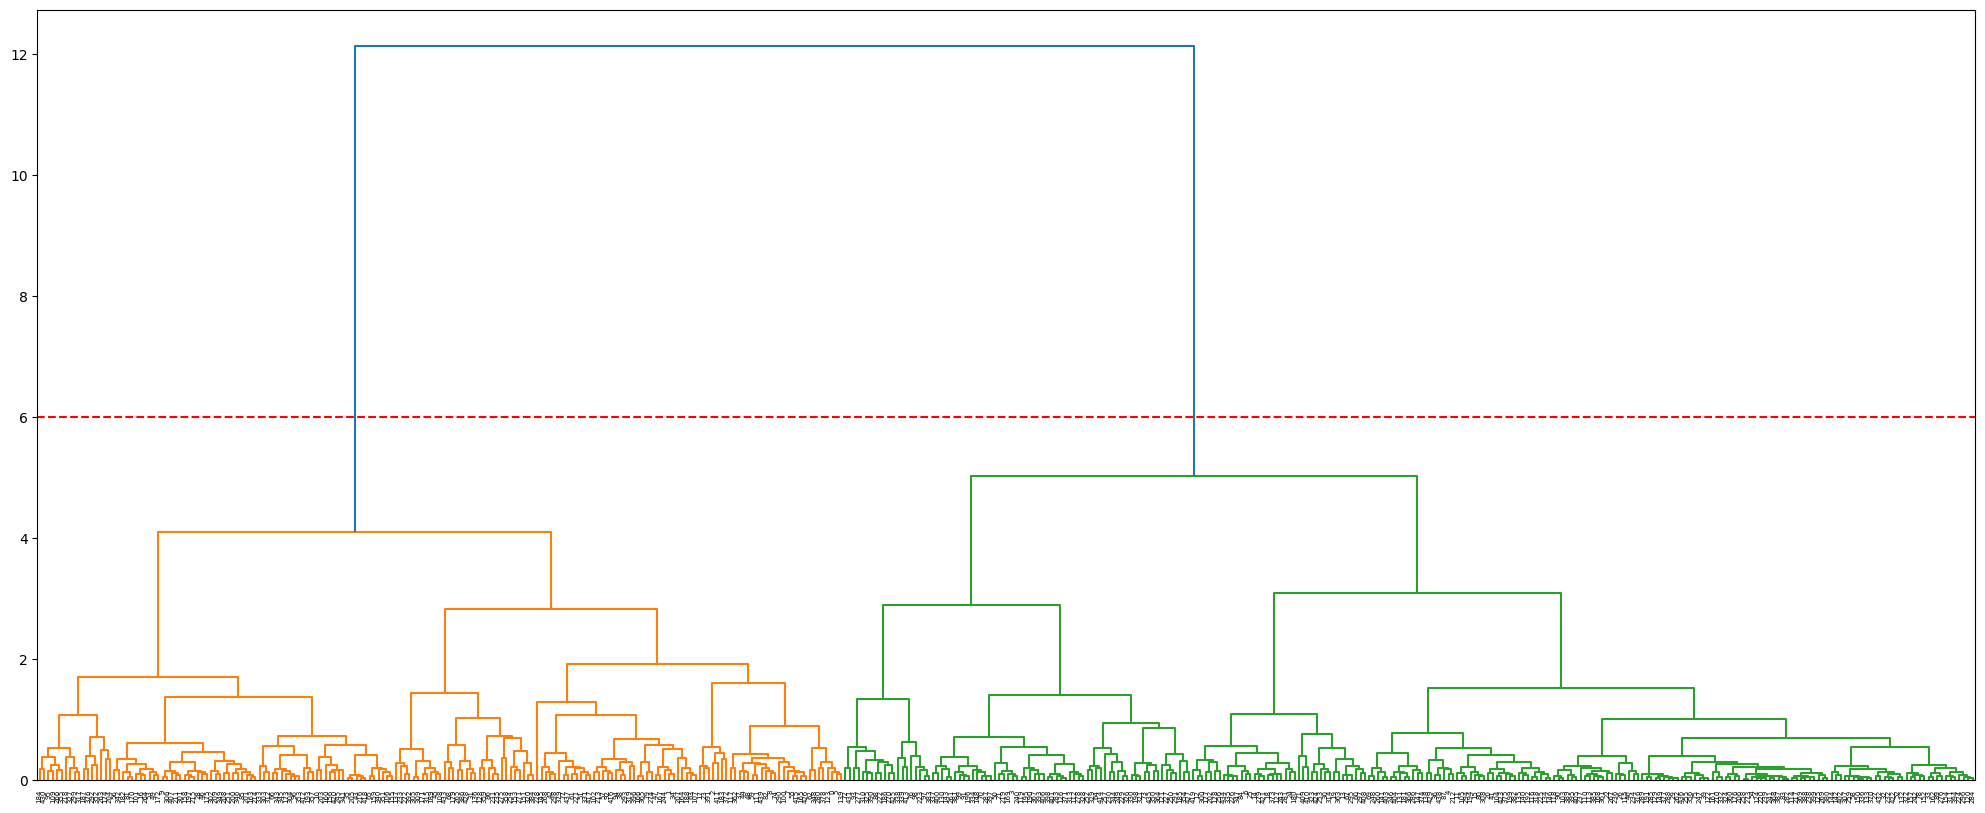

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(25,10))
dend=shc.dendrogram(shc.linkage(data_scaled,method='ward'))
plt.axhline(y=6,color='r',linestyle='--') # used for threshold value at 6 distance

In [7]:
# applying heirarchical clustering for two clusters
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')

In [8]:
cluster.fit_predict(data_scaled)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

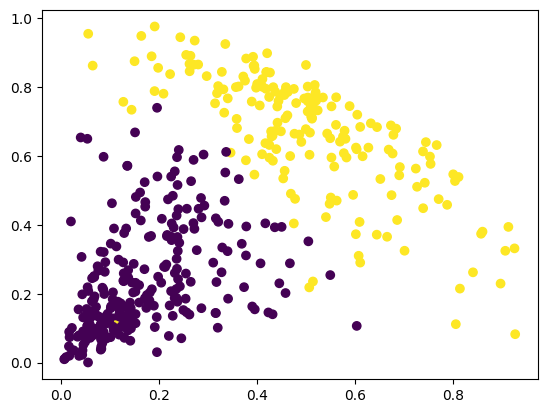

In [9]:
plt.scatter(data_scaled['Milk'],data_scaled['Grocery'],c=cluster.labels_)

# K Means Clustering

In [22]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
data=pd.read_csv("income.csv")

In [24]:
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'income')

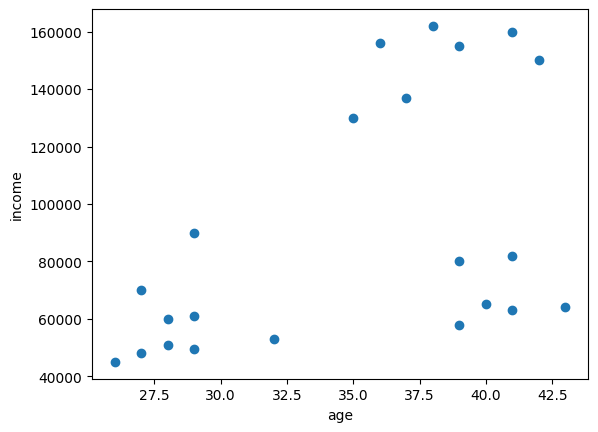

In [25]:
plt.scatter(data.Age,data["Income($)"])
plt.xlabel("age")
plt.ylabel("income")

In [26]:
km=KMeans(n_clusters=2,n_init="auto")
y_pred=km.fit_predict(data[["Age","Income($)"]]) #If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
data['Cluster']=y_pred

In [31]:
# data.drop("Cluster",axis=1,inplace=True)


In [45]:
data.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [33]:
km.cluster_centers_

array([[3.32000000e+01, 6.26333333e+04],
       [3.82857143e+01, 1.50000000e+05]])

Text(0, 0.5, 'income')

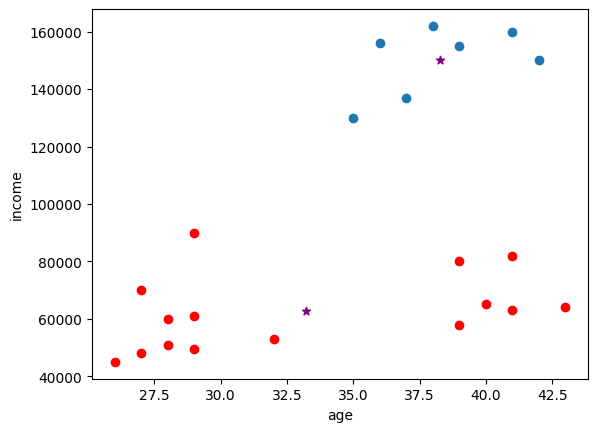

In [34]:
data1=data[data.Cluster==0]
data2=data[data.Cluster==1]
plt.scatter(data1.Age,data1["Income($)"],color="red")
plt.scatter(data2.Age,data2["Income($)"])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('age')
plt.ylabel('income')

In [35]:

sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k,n_init='auto')
    km.fit(data[['Age','Income($)']]) # fitting features
    sse.append(km.inertia_) #km.inertia_ will give you sum of square error

Text(0.5, 0, 'K')

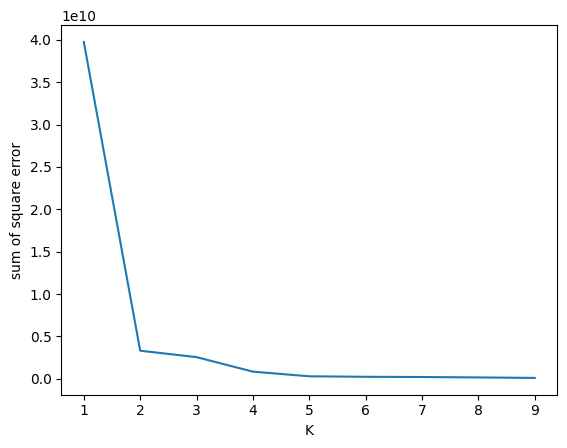

In [36]:
plt.plot(k_rng,sse)
plt.ylabel("sum of square error")
plt.xlabel("K")

In [37]:
#preprocessing(standardising large data for proper distribution)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(data[['Income($)']])
data['Income($)']=scaler.transform(data[['Income($)']])

In [38]:
scaler.fit(data[['Age']])
data['Age']=scaler.transform(data[['Age']])

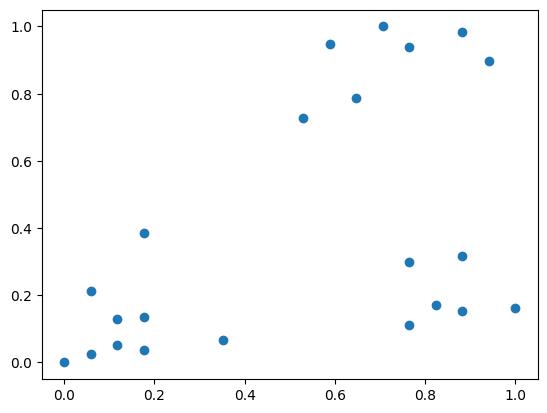

In [39]:
plt.scatter(data.Age,data['Income($)'])

In [40]:
# clustering of preprocessed data
km=KMeans(n_clusters=2,n_init="auto")
y_pred=km.fit_predict(data[["Age","Income($)"]]) #If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [41]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.78280543, 0.57659435]])

Text(0, 0.5, 'income')

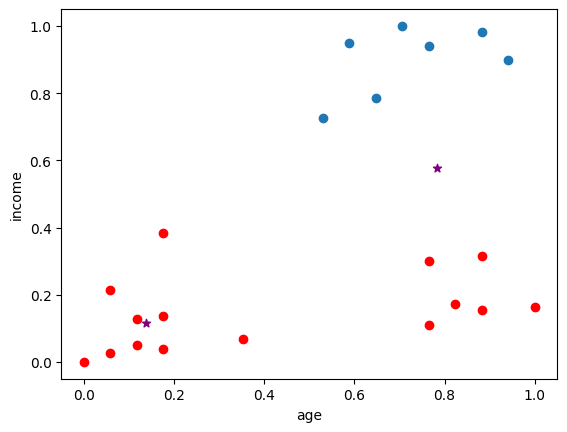

In [42]:
data3=data[data.Cluster==0]
data4=data[data.Cluster==1]
plt.scatter(data3.Age,data3["Income($)"],color="red")
plt.scatter(data4.Age,data4["Income($)"])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('age')
plt.ylabel('income')

In [43]:

sse=[]
k_rng=range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k,n_init='auto')
    km.fit(data[['Age','Income($)']]) # fitting features
    sse.append(km.inertia_) #km.inertia_ will give you sum of square error

Text(0.5, 0, 'K')

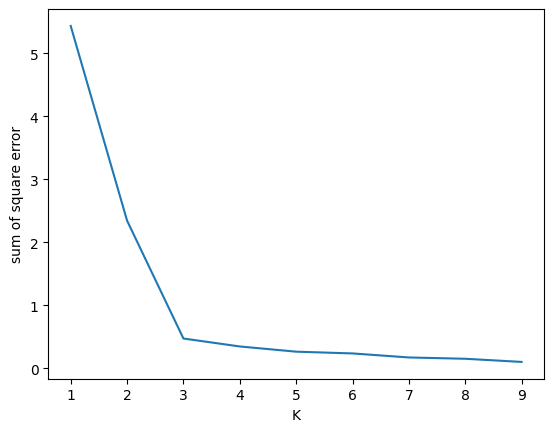

In [44]:
plt.plot(k_rng,sse)
plt.ylabel("sum of square error")
plt.xlabel("K")

# Breast cancer dataset

In [47]:
import pandas as pd
import matplotlib.pyplot as plt


In [48]:
bc=pd.read_csv('breast-cancer.csv')

In [49]:
bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [132]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [133]:
bc.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [134]:
from sklearn.preprocessing import LabelEncoder


In [135]:
#preprocessing
bc.drop('id',axis='columns',inplace=True)

le=LabelEncoder()
bc['diagnosis']=le.fit_transform(bc['diagnosis'])

# can also be done by
# bc[diagnosis]=data[diagnosis].map({'M':1,'B':0})

In [136]:
bc

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [137]:
x=bc.drop('diagnosis',axis=1).values

In [138]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [139]:
from sklearn.cluster import KMeans

In [140]:
km=KMeans(n_clusters=2,n_init="auto")
km_pred=km.fit_predict(x)

Text(0.5, 1.0, 'KMeans clustering plot')

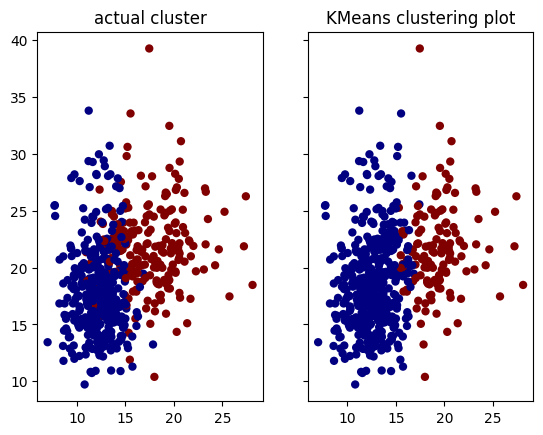

In [143]:
#subplot
f,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.scatter(x[:,0],x[:,1],c=bc["diagnosis"],cmap="jet",edgecolor="None")
ax1.set_title("actual cluster")

ax2.scatter(x[:,0],x[:,1],c=km_pred,cmap="jet",edgecolor="None")
ax2.set_title("KMeans clustering plot")

Text(0, 0.5, 'sse values')

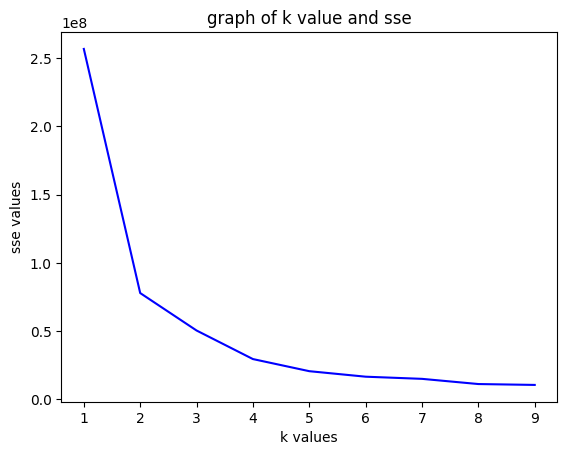

In [146]:
# elbow method

from sklearn.cluster import KMeans
sse=[]
for k in range(1,10):
    kmeans=KMeans(n_clusters=k,n_init="auto")
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

plt.plot(range(1,10),sse,color='blue')
plt.title("graph of k value and sse")
plt.xlabel("k values")
plt.ylabel("sse values")

    

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(km_pred,bc['diagnosis'])

0.8541300527240774

In [150]:
from sklearn.metrics import confusion_matrix
confusion_matrix(km_pred,bc['diagnosis'])


array([[356,  82],
       [  1, 130]], dtype=int64)